In [1]:
import numpy as np

In [2]:
# References:
# Kai Tao, Tianze Liu, Jieyuan Ning, Fenglin Niu, "Estimating sedimentary and crustal structure
# using wavefield continuation: theory, techniques and applications", Geophysical Journal International,
# Volume 197, Issue 1, April, 2014, Pages 443-457, https://doi.org/10.1093/gji/ggt515

In [3]:
import sympy

In [4]:
sympy.init_printing()

In [5]:
sympy.var('α β p ρ μ ω', positive=True, real=True)

In [6]:
sympy.var('z z0 t t0 t1', real=True)

In [7]:
μ = ρ*β**2
μ

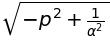

In [8]:
q_α = sympy.sqrt(1/α**2 - p**2)
q_α

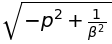

In [9]:
q_β = sympy.sqrt(1/β**2 - p**2)
q_β

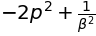

In [10]:
η = 1/β**2 - 2*p**2
η

In [11]:
M = sympy.Matrix([
    [         α*p,         α*p,       β*q_β,       β*q_β],
    [       α*q_α,      -α*q_α,        -β*p,         β*p],
    [-2*α*μ*p*q_α, 2*α*μ*p*q_α,      -β*μ*η,       β*μ*η],
    [      -α*μ*η,      -α*μ*η, 2*β*μ*p*q_β, 2*β*μ*p*q_β]
])
M

⎡                                                                     ________
⎢                                                                    ╱    2   
⎢            p⋅α                           p⋅α                 β⋅   ╱  - p  + 
⎢                                                                  ╱          
⎢                                                                ╲╱           
⎢                                                                             
⎢            ___________                   ___________                        
⎢           ╱    2   1                    ╱    2   1                          
⎢     α⋅   ╱  - p  + ──            -α⋅   ╱  - p  + ──                 -p⋅β    
⎢         ╱           2                 ╱           2                         
⎢       ╲╱           α                ╲╱           α                          
⎢                                                                             
⎢                 ___________                  _____

In [12]:
Minv = (1/ρ)*sympy.Matrix([
    [        μ*p/α,  η*μ/(2*α*q_α), -p/(2*α*q_α),    -1/(2*α)],
    [        μ*p/α, -η*μ/(2*α*q_α),  p/(2*α*q_α),    -1/(2*α)],
    [η*μ/(2*β*q_β),         -μ*p/β,     -1/(2*β), p/(2*β*q_β)],
    [η*μ/(2*β*q_β),          μ*p/β,      1/(2*β), p/(2*β*q_β)]
])
Minv

⎡                       2 ⎛     2   1 ⎞                                       
⎢                      β ⋅⎜- 2⋅p  + ──⎟                                       
⎢          2              ⎜          2⎟                                       
⎢       p⋅β               ⎝         β ⎠             -p                      -1
⎢       ────         ────────────────────  ──────────────────────          ───
⎢        α                    ___________             ___________          2⋅α
⎢                            ╱    2   1              ╱    2   1               
⎢                    2⋅α⋅   ╱  - p  + ──   2⋅α⋅ρ⋅   ╱  - p  + ──              
⎢                          ╱           2           ╱           2              
⎢                        ╲╱           α          ╲╱           α               
⎢                                                                             
⎢                        2 ⎛   2   1 ⎞                                        
⎢                       β ⋅⎜2⋅p  - ──⎟              

In [13]:
deig = sympy.diag(-q_α, q_α, -q_β, q_β)
deig

⎡      ___________                                                       ⎤
⎢     ╱    2   1                                                         ⎥
⎢-   ╱  - p  + ──          0                  0                 0        ⎥
⎢   ╱           2                                                        ⎥
⎢ ╲╱           α                                                         ⎥
⎢                                                                        ⎥
⎢                        ___________                                     ⎥
⎢                       ╱    2   1                                       ⎥
⎢        0             ╱  - p  + ──           0                 0        ⎥
⎢                     ╱           2                                      ⎥
⎢                   ╲╱           α                                       ⎥
⎢                                                                        ⎥
⎢                                           ___________                  ⎥
⎢                        

In [14]:
# Lame constant
λ = ρ*(α**2 - 2*β**2)
λ

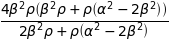

In [15]:
γ = 4*μ*(λ + μ)/(λ + 2*μ)
γ

In [16]:
A = sympy.Matrix([
    [0, p, 1/μ, 0],
    [p*λ/(λ + 2*μ), 0, 0, 1/(λ + 2*μ)],
    [ρ - (p**2)*γ, 0, 0, p*λ/(λ + 2*μ)],
    [0, ρ, p, 0]
])
A

⎡                                            1                          ⎤
⎢                  0                     p  ────            0           ⎥
⎢                                            2                          ⎥
⎢                                           β ⋅ρ                        ⎥
⎢                                                                       ⎥
⎢               ⎛ 2      2⎞                                             ⎥
⎢           p⋅ρ⋅⎝α  - 2⋅β ⎠                                 1           ⎥
⎢        ──────────────────────          0   0    ──────────────────────⎥
⎢           2       ⎛ 2      2⎞                      2       ⎛ 2      2⎞⎥
⎢        2⋅β ⋅ρ + ρ⋅⎝α  - 2⋅β ⎠                   2⋅β ⋅ρ + ρ⋅⎝α  - 2⋅β ⎠⎥
⎢                                                                       ⎥
⎢     2  2   ⎛ 2       ⎛ 2      2⎞⎞                      ⎛ 2      2⎞    ⎥
⎢  4⋅p ⋅β ⋅ρ⋅⎝β ⋅ρ + ρ⋅⎝α  - 2⋅β ⎠⎠                  p⋅ρ⋅⎝α  - 2⋅β ⎠    ⎥
⎢- ──────────────────────────────── + 

In [17]:
sympy.simplify(A - M*deig*Minv)

⎡0  0  0  0⎤
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎣0  0  0  0⎦

In [18]:
Pdiag = sympy.diag(sympy.exp(sympy.I*ω*q_α*(z - z0)),
                   sympy.exp(-sympy.I*ω*q_α*(z - z0)),
                   sympy.exp(sympy.I*ω*q_β*(z - z0)),
                   sympy.exp(-sympy.I*ω*q_β*(z - z0)))
Pdiag

⎡          ___________                                                        
⎢         ╱    2   1                                                          
⎢ ⅈ⋅ω⋅   ╱  - p  + ── ⋅(z - z₀)                                               
⎢       ╱           2                                                         
⎢     ╲╱           α                                                          
⎢ℯ                                              0                             
⎢                                                                             
⎢                                           ___________                       
⎢                                          ╱    2   1                         
⎢                                 -ⅈ⋅ω⋅   ╱  - p  + ── ⋅(z - z₀)              
⎢                                        ╱           2                        
⎢                                      ╲╱           α                         
⎢              0                 ℯ                  

In [19]:
P = M*Pdiag*Minv

## Study case of half-space with no layers (mantle only)

In [20]:
sympy.var('v_r0 v_z0')

In [21]:
P0 = P.subs([(z0, 0)])

In [22]:
w = Minv*P0*sympy.Matrix([v_r0, v_z0, 0, 0])

In [23]:
S_up = sympy.simplify(w[3])

In [24]:
St_up = sympy.InverseFourierTransform(S_up, ω, t)

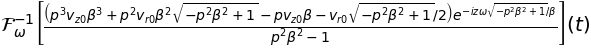

In [25]:
St_up

In [26]:
Jz_Sup = -ρ*(β**2)*q_β*sympy.Abs(St_up)**2

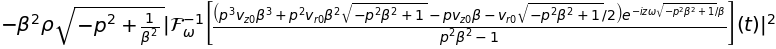

In [27]:
Jz_Sup

In [28]:
energy = sympy.Integral(Jz_Sup, (t, t0, t1))

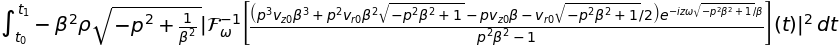

In [29]:
energy

In [30]:
# Units of density don't matter since it turns out to be just a scaling factor